In [1]:
modelname='2048_6_18_CNN5_maxpool_whatever_data_I_have'

In [2]:
import tensorflow as tf
import numpy as np
from keras.utils import np_utils

Using TensorFlow backend.


In [3]:
import tensorflow as tf
from tensorflow import keras
import keras.backend as K
from tensorflow.keras import layers
from game2048.NNagent_5_maxpool import NNAgent
from game2048.game import Game
tf.keras.backend.clear_session()
game = Game(4, random=False)
train=NNAgent(game,training=True)


model=train.model
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
cat_input (InputLayer)          [(None, None, 4, 4,  0                                            
__________________________________________________________________________________________________
time_distributed (TimeDistribut (None, None, 4, 4, 2 14430       cat_input[0][0]                  
__________________________________________________________________________________________________
time_distributed_1 (TimeDistrib (None, None, 4, 4, 2 197358      time_distributed[0][0]           
__________________________________________________________________________________________________
time_distributed_2 (TimeDistrib (None, None, 4, 4, 2 197358      time_distributed_1[0][0]         
______________________________________________________________________________________________

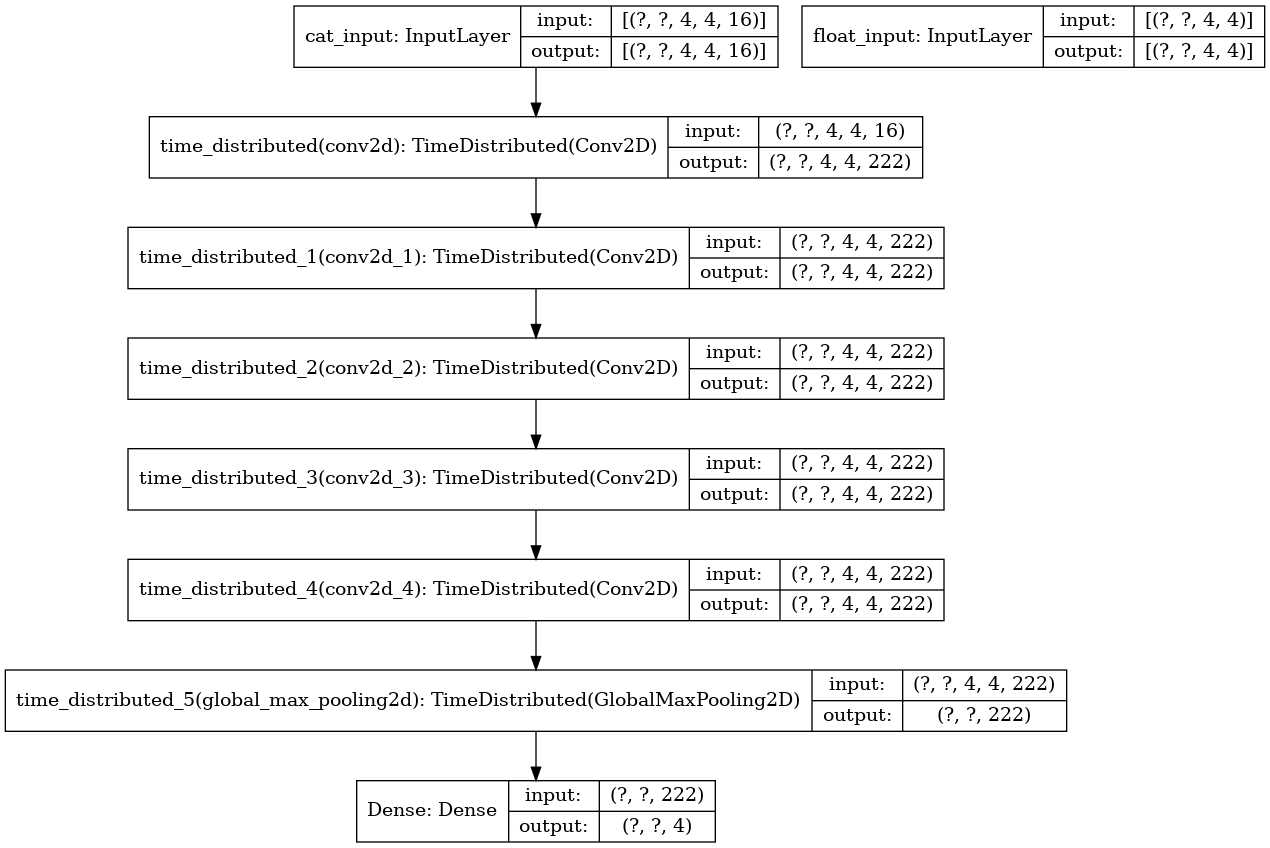

In [4]:
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=True,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96)
from IPython.display import Image
Image("model.png")

In [5]:
def train_one_time():
    X=np.load(folder+batch+'/X.npy')
    Y=np.load(folder+batch+'/Y.npy')
    if Y.ndim==1:
        X=X.reshape((1,-1,4,4))
        Y=Y.reshape((1,-1))
    for _ in range(epochs):
        print (folder,'batch',batch,'step',X.shape[1],'rotate',k)
        batch_size=int(150*250/X.shape[1])
        X_rot=np.rot90(X,k=k,axes=(2,3))
        Y_rot=(Y+k)%4
        X_cat=np_utils.to_categorical(X_rot,num_classes=16)
        Y_cat=np_utils.to_categorical(Y_rot,num_classes=4)
        model.fit([X_rot,X_cat],Y_cat,batch_size=batch_size)
        if uses_flip:
            X_flip=np.flip(X_rot,3)  #flip with regrad to column
            X_cat=np_utils.to_categorical(X_flip,num_classes=16)
            Y_cat[:,:,[0,2]]=Y_cat[:,:,[2,0]]
            model.fit([X_flip,X_cat],Y_cat,batch_size=batch_size)
            del X_flip

In [6]:
import os
from datetime import datetime
import time
import gc
epochs=1
uses_flip=True
foldername=[]
foldername.append("data0.5/forevermerge/")
foldername.append("data0.5/0_1000/")
foldername.append("data0.5/0_1000_learned/")
foldername.append("data0.5/1000_2000_expecti2ndmove/")
foldername.append("data0.5/1000_2000/")
# import tracemalloc
# tracemalloc.start()
for k in range(0,4):
    print (datetime.now())
    for folder in foldername:
        batches=os.listdir(folder)
        for batch in batches:
            if not os.path.isdir(folder+batch):
                continue
            train_one_time()
            gc.collect(generation=2)
            model.save_weights(modelname)
    print (datetime.now())

14/14 [==============================] - 9s 669ms/step - loss: 0.5744 - categorical_accuracy: 0.7386
data0.5/0_1000_learned/ batch 18 step 1000 rotate 1
14/14 [==============================] - 10s 680ms/step - loss: 0.5712 - categorical_accuracy: 0.7412
data0.5/0_1000_learned/ batch 21 step 1000 rotate 1
14/14 [==============================] - 10s 679ms/step - loss: 0.5747 - categorical_accuracy: 0.7394
data0.5/0_1000_learned/ batch 0 step 1000 rotate 1
3/3 [==============================] - 1s 370ms/step - loss: 0.5771 - categorical_accuracy: 0.7381
data0.5/0_1000_learned/ batch 27 step 1000 rotate 1
14/14 [==============================] - 9s 669ms/step - loss: 0.5732 - categorical_accuracy: 0.7403
data0.5/0_1000_learned/ batch 31 step 1000 rotate 1
14/14 [==============================] - 10s 679ms/step - loss: 0.5737 - categorical_accuracy: 0.7393
data0.5/0_1000_learned/ batch 5 step 1000 rotate 1
3/3 [==============================] - 1s 363ms/step - loss: 0.5675 - categorical_a

28/28 [==============================] - 20s 710ms/step - loss: 0.5535 - categorical_accuracy: 0.7483
data0.5/1000_2000/ batch 43 step 1000 rotate 1
28/28 [==============================] - 20s 700ms/step - loss: 0.5514 - categorical_accuracy: 0.7494
data0.5/1000_2000/ batch 2 step 1000 rotate 1
28/28 [==============================] - 20s 700ms/step - loss: 0.5523 - categorical_accuracy: 0.7486
data0.5/1000_2000/ batch 32 step 1000 rotate 1
28/28 [==============================] - 20s 701ms/step - loss: 0.5536 - categorical_accuracy: 0.7488
data0.5/1000_2000/ batch 36 step 1000 rotate 1
28/28 [==============================] - 20s 701ms/step - loss: 0.5521 - categorical_accuracy: 0.7495
2020-06-19 12:51:48.375401
2020-06-19 12:51:48.375564
data0.5/forevermerge/ batch 7 step 1000 rotate 2
28/28 [==============================] - 20s 703ms/step - loss: 0.5736 - categorical_accuracy: 0.7394
data0.5/forevermerge/ batch 8 step 1000 rotate 2
28/28 [==============================] - 20s 702m

28/28 [==============================] - 20s 700ms/step - loss: 0.5423 - categorical_accuracy: 0.7553
data0.5/0_1000/ batch 0 step 1000 rotate 2
28/28 [==============================] - 20s 701ms/step - loss: 0.5437 - categorical_accuracy: 0.7550
data0.5/0_1000/ batch 47 step 1000 rotate 2
28/28 [==============================] - 20s 702ms/step - loss: 0.5438 - categorical_accuracy: 0.7546
data0.5/0_1000/ batch 44 step 1000 rotate 2
28/28 [==============================] - 20s 702ms/step - loss: 0.5423 - categorical_accuracy: 0.7556
data0.5/0_1000/ batch 27 step 1000 rotate 2
28/28 [==============================] - 20s 703ms/step - loss: 0.5434 - categorical_accuracy: 0.7547
data0.5/0_1000/ batch 31 step 1000 rotate 2
28/28 [==============================] - 20s 703ms/step - loss: 0.5412 - categorical_accuracy: 0.7560
data0.5/0_1000/ batch 5 step 1000 rotate 2
28/28 [==============================] - 20s 697ms/step - loss: 0.5417 - categorical_accuracy: 0.7564
data0.5/0_1000/ batch 43

14/14 [==============================] - 9s 668ms/step - loss: 0.5470 - categorical_accuracy: 0.7535
data0.5/0_1000_learned/ batch 24 step 1000 rotate 2
14/14 [==============================] - 9s 672ms/step - loss: 0.5502 - categorical_accuracy: 0.7523
data0.5/0_1000_learned/ batch 25 step 1000 rotate 2
14/14 [==============================] - 9s 669ms/step - loss: 0.5487 - categorical_accuracy: 0.7517
data0.5/0_1000_learned/ batch 14 step 1000 rotate 2
14/14 [==============================] - 9s 669ms/step - loss: 0.5519 - categorical_accuracy: 0.7510
data0.5/0_1000_learned/ batch 15 step 1000 rotate 2
14/14 [==============================] - 10s 679ms/step - loss: 0.5482 - categorical_accuracy: 0.7529
data0.5/0_1000_learned/ batch 18 step 1000 rotate 2
14/14 [==============================] - 9s 675ms/step - loss: 0.5482 - categorical_accuracy: 0.7528
data0.5/0_1000_learned/ batch 21 step 1000 rotate 2
14/14 [==============================] - 9s 671ms/step - loss: 0.5483 - categoric

28/28 [==============================] - 20s 711ms/step - loss: 0.5322 - categorical_accuracy: 0.7602
data0.5/1000_2000/ batch 44 step 1000 rotate 2
28/28 [==============================] - 20s 702ms/step - loss: 0.5332 - categorical_accuracy: 0.7590
data0.5/1000_2000/ batch 27 step 1000 rotate 2
28/28 [==============================] - 20s 703ms/step - loss: 0.5320 - categorical_accuracy: 0.7592
data0.5/1000_2000/ batch 31 step 1000 rotate 2
28/28 [==============================] - 20s 698ms/step - loss: 0.5320 - categorical_accuracy: 0.7598
data0.5/1000_2000/ batch 5 step 1000 rotate 2
28/28 [==============================] - 20s 703ms/step - loss: 0.5337 - categorical_accuracy: 0.7594
data0.5/1000_2000/ batch 43 step 1000 rotate 2
28/28 [==============================] - 19s 694ms/step - loss: 0.5320 - categorical_accuracy: 0.7597
data0.5/1000_2000/ batch 2 step 1000 rotate 2
28/28 [==============================] - 20s 711ms/step - loss: 0.5309 - categorical_accuracy: 0.7604
data0.

28/28 [==============================] - 20s 700ms/step - loss: 0.5304 - categorical_accuracy: 0.7619
data0.5/0_1000/ batch 14 step 1000 rotate 3
28/28 [==============================] - 20s 701ms/step - loss: 0.5283 - categorical_accuracy: 0.7631
data0.5/0_1000/ batch 15 step 1000 rotate 3
28/28 [==============================] - 20s 701ms/step - loss: 0.5285 - categorical_accuracy: 0.7625
data0.5/0_1000/ batch 18 step 1000 rotate 3
28/28 [==============================] - 20s 701ms/step - loss: 0.5278 - categorical_accuracy: 0.7629
data0.5/0_1000/ batch 21 step 1000 rotate 3
28/28 [==============================] - 20s 703ms/step - loss: 0.5274 - categorical_accuracy: 0.7631
data0.5/0_1000/ batch 0 step 1000 rotate 3
28/28 [==============================] - 20s 704ms/step - loss: 0.5292 - categorical_accuracy: 0.7628
data0.5/0_1000/ batch 47 step 1000 rotate 3
28/28 [==============================] - 20s 697ms/step - loss: 0.5298 - categorical_accuracy: 0.7627
data0.5/0_1000/ batch 4

28/28 [==============================] - 20s 703ms/step - loss: 0.5289 - categorical_accuracy: 0.7614
data0.5/1000_2000/ batch 3 step 1000 rotate 3
28/28 [==============================] - 20s 699ms/step - loss: 0.5278 - categorical_accuracy: 0.7625
data0.5/1000_2000/ batch 28 step 1000 rotate 3
28/28 [==============================] - 20s 702ms/step - loss: 0.5287 - categorical_accuracy: 0.7618
data0.5/1000_2000/ batch 49 step 1000 rotate 3
28/28 [==============================] - 20s 703ms/step - loss: 0.5269 - categorical_accuracy: 0.7626
data0.5/1000_2000/ batch 16 step 1000 rotate 3
28/28 [==============================] - 20s 699ms/step - loss: 0.5275 - categorical_accuracy: 0.7622
data0.5/1000_2000/ batch 17 step 1000 rotate 3
28/28 [==============================] - 20s 701ms/step - loss: 0.5267 - categorical_accuracy: 0.7622
data0.5/1000_2000/ batch 30 step 1000 rotate 3
28/28 [==============================] - 20s 698ms/step - loss: 0.5271 - categorical_accuracy: 0.7621
data0

In [7]:
model.save_weights(modelname)

In [5]:
model.load_weights(modelname)

In [ ]:
from game2048.NNagent_5_maxpool import NNAgent
from game2048.game import Game
from game2048.displays import Display, IPythonDisplay
import numpy as np
display1 = Display()

test=100

accuracy=np.zeros((test,),dtype=float)
score=np.zeros((test,),dtype=int)

for i in range(test):
    game = Game(4,random=False)
    agent = NNAgent(game, display=display1,debug=False)
    if test>1:
        accuracy[i]=agent.play(verbose=False)
    else:
        accuracy[i]=agent.play(verbose=True)
    score[i]=agent.game.score
    print(score[i],accuracy[i])
    

np.mean(score)
print(score)
#print (accuracy)

2048 nan
2048 nan
2048 nan
2048 nan
2048 nan
2048 nan
512 nan
2048 nan
2048 nan
2048 nan
4096 nan
1024 nan
2048 nan
512 nan
2048 nan
2048 nan
4096 nan
2048 nan
512 nan
4096 nan
1024 nan
1024 nan
2048 nan
4096 nan
2048 nan
512 nan
2048 nan
1024 nan
1024 nan
4096 nan
4096 nan
2048 nan
1024 nan
1024 nan
2048 nan
1024 nan
1024 nan
2048 nan
2048 nan
1024 nan
1024 nan
2048 nan
2048 nan
1024 nan
512 nan
1024 nan
2048 nan
2048 nan
2048 nan
2048 nan
2048 nan
2048 nan
1024 nan
2048 nan
4096 nan
2048 nan
2048 nan
2048 nan
1024 nan
2048 nan
2048 nan
4096 nan
2048 nan
2048 nan
2048 nan
1024 nan
2048 nan
1024 nan
1024 nan
2048 nan
4096 nan
512 nan
2048 nan
2048 nan
1024 nan
4096 nan
1024 nan
2048 nan
2048 nan
2048 nan
1024 nan
4096 nan
1024 nan
512 nan
2048 nan
2048 nan
2048 nan
512 nan
2048 nan
2048 nan
2048 nan
2048 nan
2048 nan


In [12]:
np.where(score==8192)[0].shape

(1,)

In [1]:
from game2048.NNagent_5_maxpool import NNAgent
from game2048.game import Game
from game2048.displays import Display, IPythonDisplay
import numpy as np
import time
display1 = Display()

test=1000

accuracy=np.zeros((test,),dtype=float)
score=np.zeros((test,),dtype=int)
game = Game(4, 2048,random=True)

agent = NNAgent(game)
start=time.time()
for i in range(test):
    agent.step()
print (time.time()-start)

agent = NNAgent(game,vote=False)
start=time.time()
for i in range(test):
    agent.step()
print (time.time()-start)

Using TensorFlow backend.


34.53486943244934
24.63879919052124
